In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('1000_Companies.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

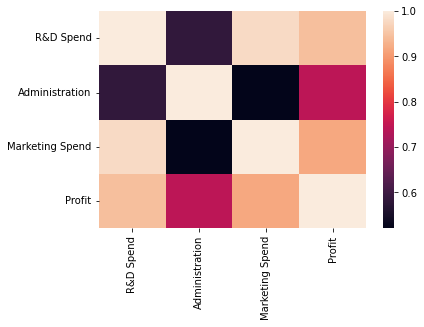

In [4]:
#heatmap
sns.heatmap(data.corr())

In [5]:
data.shape

(1000, 5)

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [7]:
# changing State column to float type

X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [8]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [9]:
X = X[:, 1:]

In [10]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [13]:
# fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
# predicting test set results
y_pred = regressor.predict(X_test)
y_pred

array([119042.21861638, 118948.59590497, 119071.04663944, 118668.81758194,
       117887.86441153, 117846.22060329, 117858.03177573, 119036.4704637 ,
       117842.8895029 , 118432.63756028, 119034.17632746, 118653.16371937,
       119100.53347142, 118751.89441519, 119046.45617105, 117750.88312653,
       118705.07438846, 119046.45617105, 118661.21486025, 117842.8895029 ,
       117885.28010357, 119177.30127535, 118668.81758194, 119018.89056107,
       119100.35732411, 118959.85224141, 117825.19981323, 117903.47331975,
       118915.40813503, 119046.45617105, 118649.18470151, 119070.34529239,
       117822.31772583, 118672.72395543, 119013.84994458, 119100.99402226,
       117842.8895029 , 118668.81758194, 118668.81758194, 118685.18062452,
       117885.95734851, 119046.45617105, 119063.64738761, 118614.90383012,
       118662.06724648, 118768.87701377, 118678.34017701, 118884.33878142,
       118663.07118755, 118661.8758263 , 118668.81758194, 118668.81758194,
       118955.0283072 , 1

In [15]:
# calculate the coefficients
print(regressor.coef_)

[-2.21833256e+04 -1.76896897e+01 -2.29149868e+04 ...  5.48241102e+02
  1.70602513e+02 -6.55325566e+02]


In [16]:
# calculate the intercept
print(regressor.intercept_)

118498.21506857133


In [18]:
# calculate the R-squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.0032964207893109165